Firstly import necessary libraries and set options

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

Then read data from CSV file into dataframe and pre-process data. For this we replace any `n/a` value with `NaN` and then use that to drop the row. We then convert the `Value` and `Time` columns to numeric values.

In [8]:
df = pd.read_csv('average-hourly-pay.csv')

df = df.replace("n/a", np.nan)
df = df.dropna(subset=['Value'])

df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df['Year'] = pd.to_numeric(df['Time'], errors='coerce')

Next we get our x and y values. For our x values we use the ethnicity and year, converting them into dummy values using one-hot.

In [9]:
x = pd.get_dummies(df[['Ethnicity', 'Year']], drop_first=True)
y = df['Value']

After this we use linear regression and fit our x and y values to our model. We also then use our x value to get our predicted pay.

In [10]:
model = LinearRegression()
model.fit(x, y)

predicted_pay = model.predict(x)

After this we print out our values into the console so that they can be read over.

In [11]:
results = pd.DataFrame(
    {
        'Ethnicity': df['Ethnicity'], 
        'Year': df['Year'], 
        'Predicted Pay': predicted_pay,
        'Actual Pay': y
    })
print(results)

                  Ethnicity  Year  Predicted Pay  Actual Pay
0                       All  2013       9.814669       10.54
1                     Asian  2013       9.731336       10.07
2                     Black  2013       9.063558       10.27
3                    Indian  2013      11.496891       11.55
4                     Mixed  2013       9.854669       11.00
5               Other Asian  2013       9.613558       10.17
6                     Other  2013       9.420225        9.69
7    Pakistani/ Bangladeshi  2013       7.831336        8.13
8                     White  2013       9.854669       10.58
9             White British  2013       9.873558       10.60
11              White Other  2013       9.626891       10.13
12                      All  2014      10.278780       10.69
13                    Asian  2014      10.195446        9.82
14                    Black  2014       9.527668       10.00
15                   Indian  2014      11.961002       12.03
16                    Mi

Finally we plot our graph and get our co-efficients.

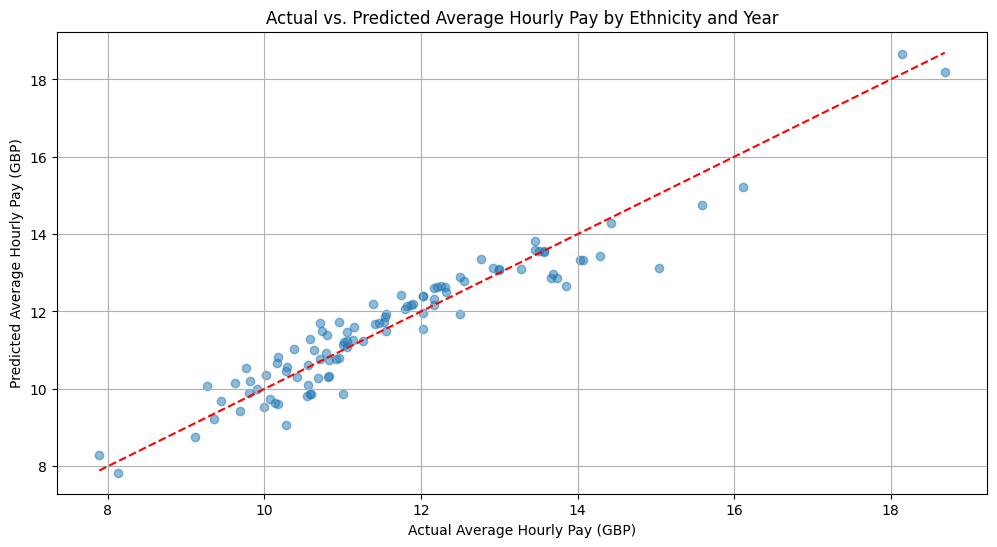

                                  Coefficient
Year                                 0.464111
Ethnicity_Asian                     -0.083333
Ethnicity_Black                     -0.751111
Ethnicity_Indian                     1.682222
Ethnicity_Mixed                      0.040000
Ethnicity_Other                     -0.394444
Ethnicity_Other Asian               -0.201111
Ethnicity_Pakistani/ Bangladeshi    -1.983333
Ethnicity_White                      0.040000
Ethnicity_White British              0.058889
Ethnicity_White Irish                5.119502
Ethnicity_White Other               -0.187778


In [12]:
plt.figure(figsize=(12, 6))
plt.scatter(y, predicted_pay, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Line of equality
plt.xlabel('Actual Average Hourly Pay (GBP)')
plt.ylabel('Predicted Average Hourly Pay (GBP)')
plt.title('Actual vs. Predicted Average Hourly Pay by Ethnicity and Year')
plt.grid(True)
plt.show()

coefficients = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coefficients)